<b><h1 style="font-family:verdana;"> <center>🌞 Welcome to My Notebook! 🌞</center> </h1></b>
<b><h2 style="font-family:verdana;"> <center>📚 Create a Better &amp; Easy Model : The Tutorial for Beginners 📚</center> </h2></b><br>

***

<div style="font-size:120%"> <br>
    <center>
        <b>NOTICE</b>: This notebook is designed for 🌱<b>beginners</b>🌱 to practice <b>Hyperparameter Tuning with Optuna and Machine Learning with LightGBM</b>. <br>The dataset used here requires minimal preprocessing, which will aid in quickly grasping the machine learning process.<br><br>
        In particular, <b>detailed explanations</b> have been provided for each step to make it easy for beginners to understand. <br>Follow along with the tutorial and try to comprehend each step!📈🎯</center><br><br><center>✨✨✨</div><br><br>
        <b>📌 MESSAGE</b> Please keep in mind that, I am a beginner and on my learning journey as most of you. I just want to share something that will be useful for many kagglers working hard on their notebooks. If you find this notebook useful in anyway, please <b>💗upvote💗</b> it so that it can reach a bigger audience. You can share it with your fellow kagglers.
        </div>
    </div>
    

***

# ✨Table of Contents✨
0. [Outline](#ch0)<br>
1. [Load Data](#ch1)<br>
2. [Data Exploration](#ch2)
3. [Statistical Analysis](#ch3)
    - 3.1 [Independent Samples t-test](#ch3.1)
    - 3.2 [Analysis of Variance(ANOVA)](#ch3.2)
    - 3.3 [Independence test (Chi-square test)](#ch3.3)
4. [Preprocessing](#ch4)
5. [Modeling](#ch5)
    - 5.1 [Hyperparameter Tuning](#ch5.1)
    - 5.2 [LGBMClassifier](#ch5.2)
6. [Project Evaluation](#ch6)
7. [Lesson Learned](#ch7)

# 0. Introduction<a class='anchor' id='ch0'></a>
<div style="font-size:120%"> 
In modern society, obesity has emerged as a serious health issue. Obesity not only leads to health problems such as diabetes, cardiovascular diseases, and arthritis but also incurs national-level expenses for managing and treating the health of citizens. Today, we will predict the risk of obesity using factors such as age, family history of obesity, and dietary habits.<br><br>
    <b>Dataset Description:</b>
</div>

| Column | Full Form | Description| 
|---|---|---|
| 'id'| id | Unique for each person(row)|
|'Gender'| Gender| person's Gender|
| 'Age' | Age| Dtype is float. Age is between 14 years to 61 years |
|'Height'| Height | Height is in meter it's between 1.45m to 1.98m|
| 'Weight' | Weight| Weight is between 39 to 165. I think it's in KG.|
|'family_history_with_overweight'| family history <br> with overweight| yes or no question|
| 'FAVC'| Frequent consumption <br> of high calorie food| it's yes or no question. i think question they asked is <br>do you consume high calorie food|
|'FCVC'|  Frequency of <br>consumption of vegetables| Similar to FAVC. this is also `yes or no` question|
|'NCP'| Number of main meals| dtype is float, NCP is between 1 & 4. I think it should be 1,2,3,4 <br>but our data is synthetic so it's taking float values|
|'CAEC'| Consumption of <br>food between meals| takes 4 values `Sometimes`, `Frequently`, `no`, & `Always` <br>|
| 'SMOKE'| Smoke | yes or no question. i think the question is "Do you smoke?" |
|'CH2O'| Consumption of <br>water daily| CH2O takes values between 1 & 3. again it's given as <br>float may be because of synthetic data. it's values should be 1,2 or 3|
|'SCC'|  Calories consumption <br>monitoring| yes or no question|
|'FAF'| Physical activity <br>frequency| FAF is between 0 to 3, 0 means no physical activity<br> and 3 means high workout. and again, in our data it's given as float|
|'TUE'| Time using <br>technology devices| TUE is between 0 to 2. I think question will be "How long you have <br>been using technology devices to track your health." in our data it's given as float |
|'CALC'| Consumption of alcohol | Takes 4 values: `Sometimes`, `no`, `Frequently`, & `Always`|
| 'MTRANS' | Transportation used| MTRANS takes 5 values `Public_Transportation`, `Automobile`, <br>`Walking`, `Motorbike`, & `Bike`|
|'NObeyesdad'| TARGET | This is our target, takes 7 values, and in this comp. we have to give <br>the class name (Not the Probability, which is the case in most comp.)


<div style="font-size:120%"> 
    <b>NObeyesdad (Target Variable):</b>
</div>

* Insufficient_Weight : Less than 18.5
* Normal_Weight       : 18.5 to 24.9
* Overweight_Level_I, Overweight_Level_II : 25.0 to 29.9
* Obesity_Type_I      : 30.0 to 34.9
* Obesity_Type_II     : 35.0 to 39.9
* Obesity_Type_III   : Higher than 40

## Libraries
Generally, libraries necessary for the entire process are listed at the top. However, I will import libraries as needed, at the moment, to facilitate understanding of each library.

- Data Importing
    - pandas
    - numpy
- For Clearer Output
    - warnings
- Visualization
    - matplotlib
    - seaborn
- Statistical Analysis
    - pingouin(Installation needed)
    - scipy
- Preprocessing
    - sklearn(LabelEncoder, StandardScaler)
- Data Separation
    - train_train
- Hyperparameter Tuning
    - Optuna(Installation needed)
- Modeling
    - LightGBMClassifier

# 1. Load Data<a class='anchor' id='ch1'></a>

#### 🔔 Notice: I imported the original data used in the competition to improve prediction performance, adhering to the rules of the competition. 
> https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster
C. External Data. You may use data other than the Competition Data (“External Data”) to develop and test your Submissions. However, you will ensure the External Data is publicly available to use by all participants of the Competition for purposes of the competition at no cost to the other participants. The ability to use External Data under this Section 7.C (External Data) does not limit your other obligations under these Competition Rules, including but not limited to Section 11 (Winners Obligations).

In [1]:
import pandas as pd
train_data = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")
original_data = pd.read_csv("/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv")
sample_submission_data = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")

In [2]:
train_data.shape[0], original_data.shape[0]

(20758, 2111)

# 2. Data Exploration<a class='anchor' id='ch2'></a>

In [3]:
import numpy as np

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

## Null Values

In [5]:
if train_data.isnull().sum().sum() == 0:
    print('There is no null value in this data.')

There is no null value in this data.


## Duplicated Values

In [6]:
train_data.duplicated().sum()

0

In [7]:
original_data.duplicated().sum()

24

Considering that the original data is generated from online survey, we can check that there are some duplicated data in original data.

## Data Distribution

In [8]:
train_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


Interestingly, even integer data such as age is represented as floating-point numbers, which I believe is because the data provided in this competition was created by a deep learning model trained on original data.

# 3. Statistical Analysis<a class='anchor' id='ch3'></a>


To formulate hypotheses about this data and test them, let's perform a statistical analysis. 

<div class="alert alert-block alert-info">
        <b>📌 MESSAGE</b> For beginners who have difficulty with each step of statistical analysis and writing code, we've consolidated the process from checking assumptions to outputting results using user-defined functions. If you like it, feel free to use it and apply it! 
</div>

## 3.1 Independent Samples t-test<a class='anchor' id='ch3.1'></a>

In [9]:
train_data1 = train_data.loc[:]
train_data1['BMI'] = train_data1['Weight'] / (train_data1['Height'] ** 2)

To perform an independent-samples t-test, we created a continuous variable, BMI, that is similar to our dependent variable. 

In [10]:
# whether smoking status affects the degree of obesity
# with BMI(continuous)
# H0: Smoking affects
# H1: Smoking doesn't affect
import scipy.stats as stats
from scipy.stats import ttest_1samp

smoker = train_data1.loc[train_data1['SMOKE']=='yes', 'BMI']
non_smoker = train_data1.loc[train_data1['SMOKE']=='no', 'BMI']

# levene-test
print(stats.levene(smoker, non_smoker)) 
 # Homogeneity of variances is not satisfied

# ttest_ind
print(stats.ttest_ind(smoker, non_smoker, equal_var=False))
pval = stats.ttest_ind(smoker, non_smoker, equal_var=False)[1]
if pval < 0.05:
    print('There is a difference in BMI based on smoking status.')
else: 
    print('There is no difference in BMI based on smoking status.')

LeveneResult(statistic=18.27066783858734, pvalue=1.9249002397587044e-05)
TtestResult(statistic=2.3096092658595437, pvalue=0.021716004019022104, df=252.85312691209919)
There is a difference in BMI based on smoking status.


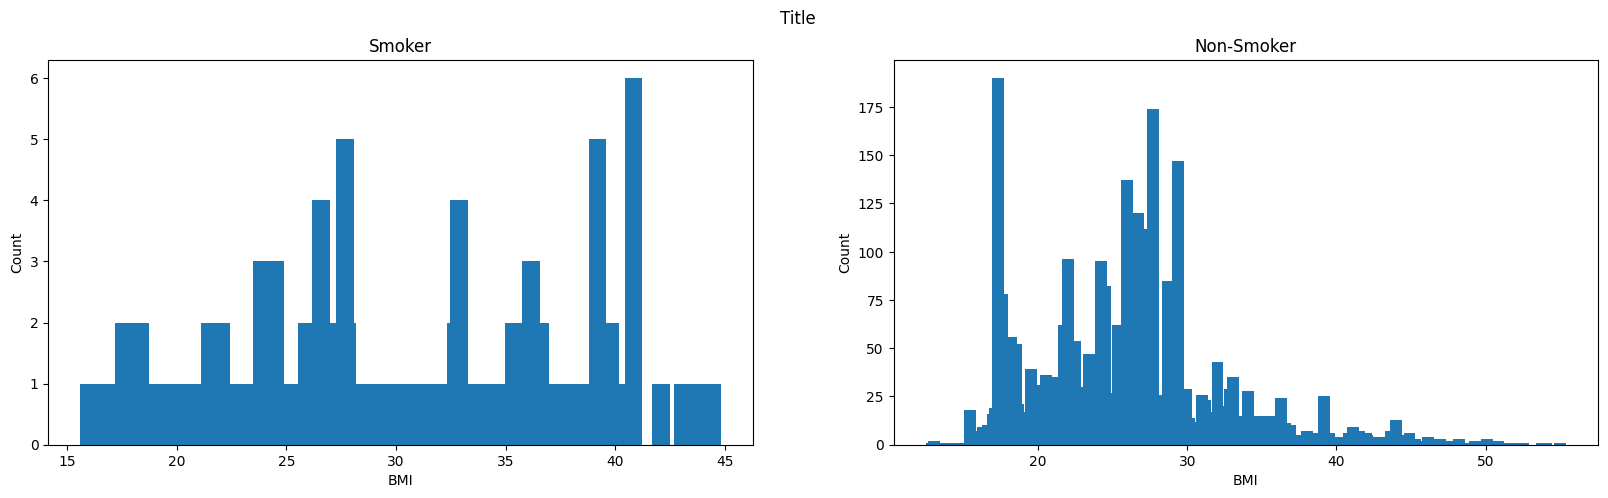

In [11]:
import matplotlib.pyplot as plt

smoker_BMI_cnt = smoker.value_counts(sort=False)
non_smoker_BMI_cnt = non_smoker.value_counts(sort=False)

fig, axs = plt.subplots(1, 2, figsize=(20,5))
fig.suptitle('Title')
width = 0.4
axs[0].bar(smoker_BMI_cnt.index, smoker_BMI_cnt.values)
axs[0].set_title('Smoker')
axs[0].set_xlabel('BMI')
axs[0].set_ylabel('Count')
axs[1].bar(non_smoker_BMI_cnt.index, non_smoker_BMI_cnt.values)
axs[1].set_title('Non-Smoker')
axs[1].set_xlabel('BMI')
axs[1].set_ylabel('Count')
plt.show()

In [12]:
pip install Pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-cv 0.8.2 requires keras-core, which is not installed.
keras-nlp 0.8.1 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
google-cloud-bigquery 2.34.4 requires packaging<22.0dev,>=14.3, but you have packaging 23.2 which is incompatible.
jupyterlab 4.1.2 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.3 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is in

## 3.2 Analysis of Variance(ANOVA)<a class='anchor' id='ch3.2'></a>

In [13]:
# Test for differences in the mean of the variable for each level of obesity (analysis of variance) 
# One-way ANOVA (Analysis of Variance)
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import pingouin as pg

# num_cols - Obesity
def levene_anova(col):

    target_list = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
                   'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
    
    tar1 = train_data1.loc[train_data1['NObeyesdad'] == 'Insufficient_Weight',col]
    tar2 = train_data1.loc[train_data1['NObeyesdad'] == 'Normal_Weight',col]
    tar3 = train_data1.loc[train_data1['NObeyesdad'] == 'Overweight_Level_I',col]
    tar4 = train_data1.loc[train_data1['NObeyesdad'] == 'Overweight_Level_II',col]
    tar5 = train_data1.loc[train_data1['NObeyesdad'] == 'Obesity_Type_I',col]
    tar6 = train_data1.loc[train_data1['NObeyesdad'] == 'Obesity_Type_II',col]
    tar7 = train_data1.loc[train_data1['NObeyesdad'] == 'Obesity_Type_III',col]

    levene = stats.levene(tar1, tar2, tar3, tar4, tar5, tar6, tar7)
    
    # levene-test
    if levene[1] < 0.05:
        print("MESSAGE: At least one of the variances among the groups is different.")
        # Welch's ANOVA since H0 is rejected
        welch = pg.welch_anova(dv=col, between='NObeyesdad', data=train_data1)

        if welch['p-unc'].item() < 0.05:
            print(f'MESSAGE: Reject the null hypothesis that the {col} are equal between the 7 groups')
            
            # post-hoc test
            mc = MultiComparison(data=train_data1[col], groups=train_data1['NObeyesdad'])
            tukeyhsd = mc.tukeyhsd(alpha=0.05)
            fig = tukeyhsd.plot_simultaneous()
            
            print(tukeyhsd.summary())
        
        else:
            print(f'MESSAGE: Accept the null hypothesis that the {col} are equal between the 7 groups')
        
    else: 
        print("MESSAGE: All groups have equal variances.")
        # ANOVA since H0 is accepted
        anova = stats.f_oneway(tar1, tar2, tar3, tar4, tar5, tar6, tar7)
        
        if anova[1] < 0.05:
            print(f'MESSAGE: Reject the null hypothesis that the {col} are equal between the 7 groups')
            mc = MultiComparison(data=train_data1[col], groups=train_data1['NObeyesdad'])
            tukeyhsd = mc.tukeyhsd(alpha=0.05)
            fig = tukeyhsd.plot_simultaneous()
            
            print(tukeyhsd.summary())
        
        else:
             print(f'MESSAGE: Accept the null hypothesis that the {col} are equal between the 7 groups')

MESSAGE: At least one of the variances among the groups is different.
MESSAGE: Reject the null hypothesis that the NCP are equal between the 7 groups
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
Insufficient_Weight       Normal_Weight    -0.03 0.6487 -0.0836  0.0236  False
Insufficient_Weight      Obesity_Type_I   -0.465    0.0 -0.5193 -0.4107   True
Insufficient_Weight     Obesity_Type_II  -0.1211    0.0 -0.1741 -0.0682   True
Insufficient_Weight    Obesity_Type_III   0.0804 0.0001  0.0298   0.131   True
Insufficient_Weight  Overweight_Level_I  -0.3914    0.0 -0.4481 -0.3346   True
Insufficient_Weight Overweight_Level_II  -0.3254    0.0 -0.3816 -0.2693   True
      Normal_Weight      Obesity_Type_I   -0.435    0.0 -0.4866 -0.3834   True
      Normal_Weight     Obesity_Type_II  -0.0911    0.0 -0.1

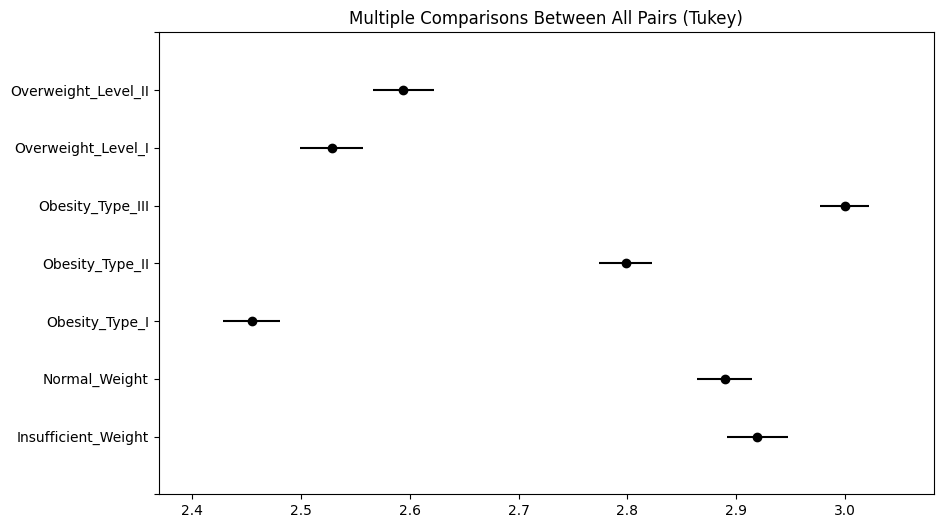

In [14]:
levene_anova('NCP')

MESSAGE: At least one of the variances among the groups is different.
MESSAGE: Reject the null hypothesis that the CH2O are equal between the 7 groups
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
Insufficient_Weight       Normal_Weight    0.062 0.0012  0.0163  0.1077   True
Insufficient_Weight      Obesity_Type_I   0.3856    0.0  0.3393  0.4319   True
Insufficient_Weight     Obesity_Type_II   0.2409    0.0  0.1957  0.2861   True
Insufficient_Weight    Obesity_Type_III   0.5882    0.0   0.545  0.6313   True
Insufficient_Weight  Overweight_Level_I   0.3252    0.0  0.2768  0.3736   True
Insufficient_Weight Overweight_Level_II   0.2603    0.0  0.2124  0.3082   True
      Normal_Weight      Obesity_Type_I   0.3236    0.0  0.2796  0.3676   True
      Normal_Weight     Obesity_Type_II   0.1789    0.0  0.

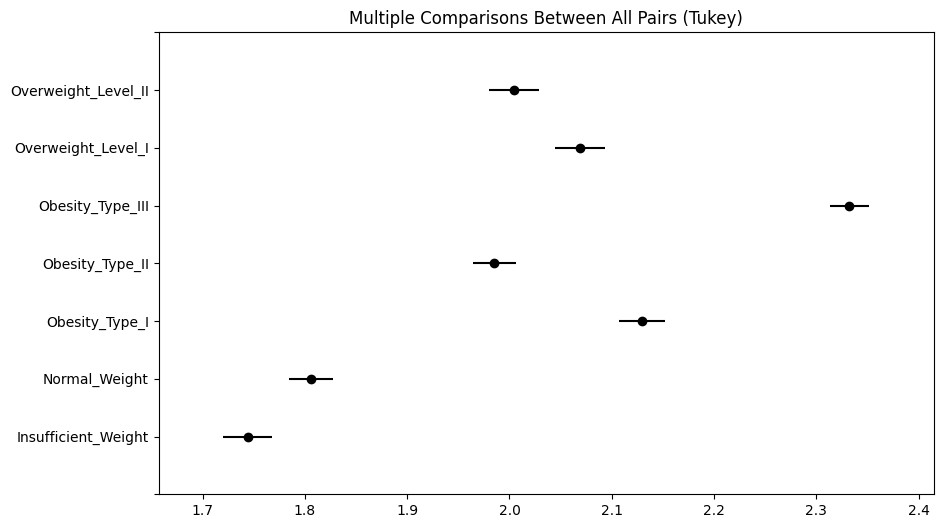

In [15]:
levene_anova('CH2O')

MESSAGE: At least one of the variances among the groups is different.
MESSAGE: Reject the null hypothesis that the TUE are equal between the 7 groups
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
Insufficient_Weight       Normal_Weight  -0.1727    0.0 -0.2194  -0.126   True
Insufficient_Weight      Obesity_Type_I  -0.0634 0.0015 -0.1107 -0.0161   True
Insufficient_Weight     Obesity_Type_II  -0.3873    0.0 -0.4334 -0.3412   True
Insufficient_Weight    Obesity_Type_III  -0.2541    0.0 -0.2982 -0.2099   True
Insufficient_Weight  Overweight_Level_I  -0.2459    0.0 -0.2953 -0.1964   True
Insufficient_Weight Overweight_Level_II  -0.1049    0.0 -0.1539 -0.0559   True
      Normal_Weight      Obesity_Type_I   0.1093    0.0  0.0643  0.1542   True
      Normal_Weight     Obesity_Type_II  -0.2146    0.0 -0.2

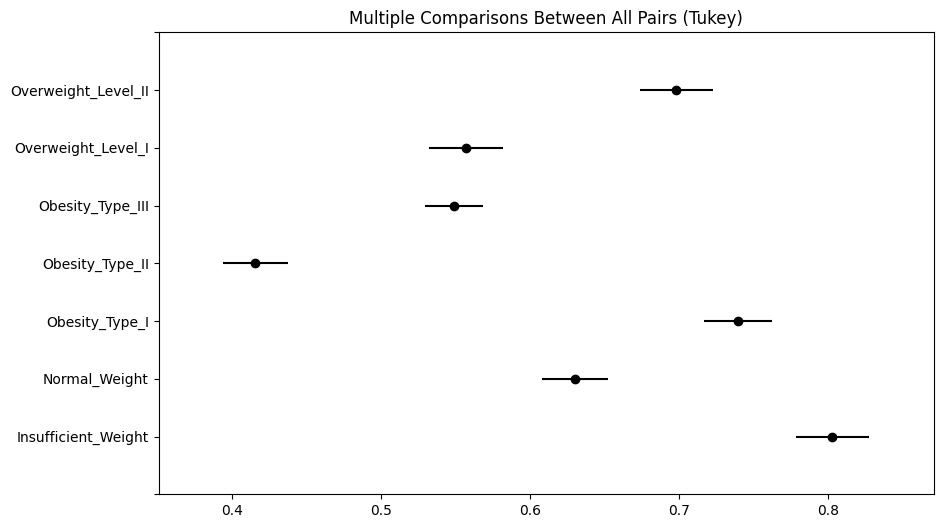

In [16]:
levene_anova('TUE')

## 3.3 Independence test (Chi-square test)<a class='anchor' id='ch3.3'></a>

In [17]:
from scipy.stats import chi2_contingency
# cat_cols-Obesity Cross-tabulation (Independence test, Chi-square test)
def chi2(col):
    cross_data = pd.crosstab(train_data1[col], train_data['NObeyesdad'])
    
    chi2, p, dof, expected = chi2_contingency(cross_data)
    msg = 'Test Statistic: {}\np-value: {}\nDegree of Freedom: {}'
    print(msg.format(chi2, p, dof))
    if p < 0.05: 
        print(f'{col} and the obesity risk is dependent.')
    else:
        print(f'{col} and the obesity risk is independent.')
    print(expected)

In [18]:
chi2('family_history_with_overweight')

Test Statistic: 6423.317090815157
p-value: 0.0
Degree of Freedom: 6
family_history_with_overweight and the obesity risk is dependent.
[[ 455.05886887  555.88245496  524.85981308  585.82291165  729.7535408
   437.74390596  454.87850467]
 [2067.94113113 2526.11754504 2385.14018692 2662.17708835 3316.2464592
  1989.25609404 2067.12149533]]


In [19]:
chi2('CAEC')

Test Statistic: 6897.329566047414
p-value: 0.0
Degree of Freedom: 18
CAEC and the obesity risk is dependent.
[[  58.09779362   70.97003565   67.00934579   74.7925619    93.16832065
    55.88717603   58.07476636]
 [ 300.45553522  367.02495423  346.54205607  386.79333269  481.82445322
   289.02321996  300.3364486 ]
 [2130.5360343  2602.58107718 2457.3364486  2742.75903266 3416.62655362
  2049.46926486 2129.69158879]
 [  33.91063686   41.42393294   39.11214953   43.65507274   54.38067251
    32.62033915   33.89719626]]


In [20]:
chi2('CALC')

Test Statistic: 4013.082706081725
p-value: 0.0
Degree of Freedom: 12
CALC and the obesity risk is dependent.
[[  64.29651219   78.54215242   74.1588785    82.77252144  103.10887369
    61.85003372   64.27102804]
 [1831.1743906  2236.89237884 2112.05607477 2357.37392812 2936.55631564
  1761.4983139  1830.44859813]
 [ 627.52909722  766.56546873  723.78504673  807.85355044 1006.33481068
   603.65165237  627.28037383]]


In [21]:
chi2('MTRANS')

Test Statistic: 2349.082567778232
p-value: 0.0
Degree of Freedom: 24
MTRANS and the obesity risk is dependent.
[[ 429.5347336   524.70315059  495.42056075  552.96425475  688.82185182
   413.19096252  429.36448598]
 [   3.88939204    4.75113209    4.48598131    5.00703343    6.23720975
     3.74140091    3.88785047]
 [   4.61865305    5.64196936    5.3271028     5.9458522     7.40668658
     4.44291358    4.61682243]
 [2028.1964062  2477.56691396 2339.29906542 2611.01146546 3252.50997206
  1951.02365353 2027.39252336]
 [  56.76081511   69.33683399   65.46728972   73.07139416   91.0242798
    54.60106947   56.73831776]]


## VIF
Multicollinearity is an important issue in classification analysis. Multicollinearity occurs when there is a strong correlation between independent variables. This means that any one of the independent variables can be expressed as a linear combination of the other independent variables.

When multicollinearity occurs, several issues can arise:

**Interpretation of the model**: When multicollinearity is present, it can be difficult to accurately interpret the impact of each independent variable. For example, multicollinearity can cause the coefficient on one independent variable to be estimated incorrectly or in the opposite direction than expected.

**Model stability**: The presence of multicollinearity can reduce the predictive power of a model. This means that the model is more prone to overfitting the data, and its ability to generalize to new data may be compromised.

**Statistical significance**: In the presence of multicollinearity, it can be difficult to determine the statistical significance of a model's regression coefficients. This can make the model's results unreliable.

Therefore, when performing classification analysis to avoid multicollinearity, it is important to use methods such as variable selection, variable transformation, and normalization to reduce multicollinearity. Also, when interpreting the results of your model, be careful to consider the presence of multicollinearity.

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

trial0 =  train_data1[list(train_data.select_dtypes(exclude=['object']).columns)]

vif_result = calculate_vif(trial0)
print(vif_result)

  feature        VIF
0      id   3.984522
1     Age  21.488351
2  Height  75.103311
3  Weight  16.335162
4    FCVC  22.252531
5     NCP  17.411882
6    CH2O  13.719299
7     FAF   2.700994
8     TUE   2.320133


A very high VIF value has been observed for the Height variable. We can either select variables to use for prediction or utilize tree-based models that are less affected by multicollinearity.

# 4. Preprocessing<a class='anchor' id='ch4'></a>

To focus on modeling and hyperparameter tuning, we minimized preprocessing (in fact, preprocessing this data does not improve performance).

## Merge Data

In [23]:
train_data = train_data.drop("id", axis=1)
train_data = pd.concat([train_data, original_data], ignore_index=True)
train_data = train_data.drop_duplicates()
train_data.shape

(22845, 17)

## Separating numerical variables and categorical variables
This is to apply different preprocessing steps (such as StandardScaler, LabelEncoder, etc.) to each type of variable.

In [24]:
num_cols = list(train_data.select_dtypes(exclude=['object']).columns)
cat_cols = list(train_data.select_dtypes(include=['object']).columns)

num_cols_test = list(test_data.select_dtypes(exclude=['object']).columns)
cat_cols_test = list(test_data.select_dtypes(include=['object']).columns)

num_cols_test = [col for col in num_cols_test if col not in ['id']]

In [25]:
for i in cat_cols:
    print(train_data[i].value_counts(), '\n', '-----------',)

Gender
Female    11457
Male      11388
Name: count, dtype: int64 
 -----------
family_history_with_overweight
yes    18736
no      4109
Name: count, dtype: int64 
 -----------
FAVC
yes    20826
no      2019
Name: count, dtype: int64 
 -----------
CAEC
Sometimes     19290
Frequently     2708
Always          531
no              316
Name: count, dtype: int64 
 -----------
SMOKE
no     22556
yes      289
Name: count, dtype: int64 
 -----------
SCC
no     22062
yes      783
Name: count, dtype: int64 
 -----------
CALC
Sometimes     16446
no             5799
Frequently      599
Always            1
Name: count, dtype: int64 
 -----------
MTRANS
Public_Transportation    18245
Automobile                3990
Walking                    522
Motorbike                   49
Bike                        39
Name: count, dtype: int64 
 -----------
NObeyesdad
Obesity_Type_III       4370
Obesity_Type_II        3545
Normal_Weight          3364
Obesity_Type_I         3261
Overweight_Level_II    2812
Insuffic

## Scaling and Encoding

## Standard Scaler

Standard Scaler is a preprocessing technique used in machine learning to standardize the features of a dataset. It transforms the data such that it has a mean of 0 and a standard deviation of 1. This process is also known as Z-score normalization. By scaling the features to have the same scale, Standard Scaler helps improve the performance of models that are sensitive to the scale of the input features, such as linear models, logistic regression, and support vector machines. It is important to note that Standard Scaler assumes that the distribution of the features is approximately Gaussian (normal distribution).

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data[num_cols] = scaler.fit_transform(train_data[num_cols])
test_data[num_cols_test] = scaler.transform(test_data[num_cols_test])

## Label Encoder

Label Encoder is a preprocessing technique used in machine learning to convert categorical labels into numerical values. It assigns a unique integer to each category in the categorical variable. For example, if we have a categorical variable "Color" with labels "Red", "Green", and "Blue", Label Encoder would assign 0, 1, and 2 to these labels, respectively. Label Encoder is often used when working with algorithms that require numerical inputs, such as decision trees and support vector machines. However, it is important to note that Label Encoder does not consider any inherent ordinal relationship between categories and simply assigns numerical values based on the order of appearance in the dataset.

In [27]:
#  object datatype columns encoding:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
object_columns = train_data.select_dtypes(include='object').columns.difference(['NObeyesdad'])

for col_name in object_columns:
    if train_data[col_name].dtypes=='object':
        train_data[col_name]=labelencoder.fit_transform(train_data[col_name])
        
for col_name in test_data.columns:
    if test_data[col_name].dtypes=='object':
        test_data[col_name]=labelencoder.fit_transform(test_data[col_name])

# Data Seperation

In [28]:
train = train_data.drop(['NObeyesdad'], axis=1)
y = train_data['NObeyesdad']
y_le = labelencoder.fit_transform(y)
test = test_data.drop(["id"],axis=1)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, y_le, test_size=0.2, random_state=42)

# 5. Modeling<a class='anchor' id='ch5'></a>

## 5.1 Hyperparameter Tuning<a class='anchor' id='ch5.1'></a>

In [30]:
# !pip install optuna

The cell below is the process to find the optimal parameters for LightGBMClassifier. To maintain a clean output, I have commented it out. If you are editing and using this notebook, uncomment the code, and replace **'INPUT YOUR RANGE HERE'** with the ranges you want to explore for each parameter.

In [31]:
'''
from optuna.samplers import TPESampler
import optuna
from lightgbm import LGBMClassifier
import logging
logging.getLogger('lightgbm').setLevel(logging.INFO)
logging.getLogger('lightgbm').setLevel(logging.ERROR)


# Define the objective function for Optuna optimization
def objective(trial, X_train, y_train, X_test, y_test):
    # Define parameters to be optimized for the LGBMClassifier
    param = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "random_state": 'SEED',
        "num_class": 'NUMBER OF CLASS',
        "num_leaves": trial.suggest_int("num_leaves", 'INPUT YOUR RANGE HERE'),
        "learning_rate": trial.suggest_float("learning_rate", 'INPUT YOUR RANGE HERE'),
        "n_estimators": trial.suggest_int("n_estimators", 'INPUT YOUR RANGE HERE'),
        "lambda_l1": trial.suggest_float("lambda_l1", 'INPUT YOUR RANGE HERE'),
        "lambda_l2": trial.suggest_float("lambda_l2", 'INPUT YOUR RANGE HERE'),
        "max_depth": trial.suggest_int("max_depth", 'INPUT YOUR RANGE HERE'),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 'INPUT YOUR RANGE HERE'),
        "subsample": trial.suggest_float("subsample", 'INPUT YOUR RANGE HERE'),
        "min_child_samples": trial.suggest_int("min_child_samples", 'INPUT YOUR RANGE HERE'),
    }
    # Create an instance of LGBMClassifier with the suggested parameters
    lgbm_classifier = LGBMClassifier(**param)

    # Fit the classifier on the training data
    lgbm_classifier.fit(X_train, y_train)

    # Evaluate the classifier on the test data
    score = lgbm_classifier.score(X_test, y_test)

    return score

# Set up the sampler for Optuna optimization
sampler = TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# Create a study object for Optuna optimization
study = optuna.create_study(direction="maximize", sampler=sampler)

# Run the optimization process
study.optimize(lambda trial: objective(trial, X_train, y_train, X_val, y_val), n_trials='INPUT YOUR NUMBER OF TRIALS')

# Get the best parameters after optimization
best_params = study.best_params
print('=' * 50)
print(best_params)
'''

'\nfrom optuna.samplers import TPESampler\nimport optuna\nfrom lightgbm import LGBMClassifier\nimport logging\nlogging.getLogger(\'lightgbm\').setLevel(logging.INFO)\nlogging.getLogger(\'lightgbm\').setLevel(logging.ERROR)\n\n\n# Define the objective function for Optuna optimization\ndef objective(trial, X_train, y_train, X_test, y_test):\n    # Define parameters to be optimized for the LGBMClassifier\n    param = {\n        "objective": "multiclass",\n        "metric": "multi_logloss",\n        "verbosity": -1,\n        "boosting_type": "gbdt",\n        "random_state": \'SEED\',\n        "num_class": \'NUMBER OF CLASS\',\n        "num_leaves": trial.suggest_int("num_leaves", \'INPUT YOUR RANGE HERE\'),\n        "learning_rate": trial.suggest_float("learning_rate", \'INPUT YOUR RANGE HERE\'),\n        "n_estimators": trial.suggest_int("n_estimators", \'INPUT YOUR RANGE HERE\'),\n        "lambda_l1": trial.suggest_float("lambda_l1", \'INPUT YOUR RANGE HERE\'),\n        "lambda_l2": tria

## 5.2 LGBMClassifier<a class='anchor' id='ch5.2'></a>

LGBMClassifier is a machine learning algorithm based on the LightGBM framework, which stands for Light Gradient Boosting Machine. It is a type of gradient boosting algorithm that is optimized for speed and performance, especially when dealing with large datasets and high-dimensional features. LGBMClassifier builds decision trees in a leaf-wise manner rather than level-wise, which helps reduce the loss function more effectively. This algorithm is known for its efficiency, scalability, and ability to handle large-scale datasets with millions of samples and features. LGBMClassifier is widely used for classification tasks and is popular in various machine learning competitions and real-world applications.


In [32]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
import logging
logging.getLogger('lightgbm').setLevel(logging.INFO)
logging.getLogger('lightgbm').setLevel(logging.ERROR)

best_params = {"objective": "multiclass",          
    "metric": "multi_logloss",          
    "verbosity": -1,                    
    "boosting_type": "gbdt",            
    "random_state": 42,       
    "num_class": 7,                     
    'learning_rate': 0.030962211546832760,  
    'n_estimators': 500,                
    'lambda_l1': 0.009667446568254372,  
    'lambda_l2': 0.04018641437301800,   
    'max_depth': 10,                    
    'colsample_bytree': 0.40977129346872643,  
    'subsample': 0.9535797422450176,   
    'min_child_samples': 26}

model_lgb = lgb.LGBMClassifier(**best_params, verbose=100)
model_lgb.fit(X_train, y_train)
pred_lgb = model_lgb.predict(X_val)
pred_proba = model_lgb.predict_proba(X_val)

## Defining the thresholds for each class

In [33]:
import optuna

def objective(trial):
    # Define the thresholds for each class
    thresholds = {}
    for i in range(num_classes):
        thresholds[f'threshold_{i}'] = trial.suggest_uniform(f'threshold_{i}', 0.0, 1.0)

    # Apply the thresholds to convert probabilities to predictions
    y_pred = apply_thresholds(pred_proba, thresholds)

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy  

def apply_thresholds(y_proba, thresholds):
    # Apply the specified thresholds to convert probabilities to predicted labels
    y_pred_labels = np.argmax(y_proba, axis=1)
    for i in range(y_proba.shape[1]):
        y_pred_labels[y_proba[:, i] > thresholds[f'threshold_{i}']] = i

    return y_pred_labels

## Prediction

The cell below, aiming to find the optimal thresholds for classification, is also commented out for a clean output. If you wish to check the values, you can uncomment the code and adjust parameters like n_trial accordingly.

In [34]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

num_classes = 7

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials='INPUT YOUR NUMBER OF TRIALS')

# # Get the best thresholds
# best_thresholds = study.best_params
# print("Best Thresholds:", best_thresholds)

In [35]:
threshold= {'threshold_0': 0.714201213234911, 'threshold_1': 0.6161299800571379, 'threshold_2': 0.29138887902587174, 'threshold_3': 0.3145837593497076, 'threshold_4': 0.8469398340837189, 'threshold_5': 0.6800824438387787, 'threshold_6': 0.35886959729223455}

In [36]:
test_label = model_lgb.predict_proba(test)
test_label = apply_thresholds(test_label, threshold)

# 6. Submission<a class='anchor' id='ch6'></a>

In [37]:
pred = labelencoder.inverse_transform(test_label)
submission = pd.DataFrame({'id': test_data.id, 'NObeyesdad': pred})
submission.to_csv('submission.csv', index=False)

# 7. Lesson Learned <a class='anchor' id='ch7'></a>

Statistical theory introduces methodologies such as reducing the size of the data as much as possible to avoid the curse of dimensionality, creating derivatives to vary the data through binning, etc. 

However, when applied to real-world data, methods such as discarding data that is **"thought"** to be unnecessary or using only certain variables can actually reduce predictive performance. 

📒Therefore, we need to have sufficient knowledge of the data and domain, and strive for optimal prediction and interpretation through various preprocessing and model selection!📒